**Title of ML learning project :                                 IPL 2023 DATASET ANALYSIS AND PREDICTION**

**Name: SHABNA**

**Organization: Entri Elevate**

**Date: [24/06/2024]**

**Overview of Problem Statement:
The Indian Premier League (IPL) is a highly popular T20 cricket tournament featuring teams from different cities in India. Analyzing player performance in the IPL can provide valuable insights for team management, player selection, and strategy formulation. Building prediction models based on historical IPL data can also help in forecasting player performance and match outcomes.**

**Objective:
To analyze the IPL 2023 dataset and develop prediction models for player performance.**

**Data Description: -Source: Kaggle dataset-IPL 2023 Dataset
Features: Player name, team, matches played, runs, batting average, strike rate, wickets taken, bowling average, economy rate, etc. https://www.kaggle.com/datasets/adityaazad79/ipl-2023-dataset?select=Bowling_PerMatchData_IPL_2023.csv
Data Collection: Import the dataset from the specified Kaggle source. - Gain insights into the data distribution, relationships, and potential patterns.**

**Step1:import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import joblib

**Step2:Load the datset**

In [2]:
df=pd.read_csv("/content/sample_data/Bowling_PerMatchData_IPL_2023.csv")
df

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Mohammed Shami,4.0,0,29,2,7.25,13,2,2.0,0,1,I23M1
1,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Hardik Pandya,3.0,0,28,0,9.33,6,2,2.0,0,0,I23M1
2,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Josh Little,4.0,0,41,1,10.25,10,4,3.0,0,0,I23M1
3,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Rashid Khan,4.0,0,26,2,6.50,10,2,1.0,0,0,I23M1
4,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Alzarri Joseph,4.0,0,33,2,8.25,8,0,3.0,0,0,I23M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,Gujarat Titans Vs Chennai Super Kings,Gujarat Titans,Hardik Pandya,1.0,0,14,0,14.00,1,1,1.0,1,0,I23M74
893,Gujarat Titans Vs Chennai Super Kings,Gujarat Titans,Rashid Khan,3.0,0,44,0,14.66,2,4,3.0,0,0,I23M74
894,Gujarat Titans Vs Chennai Super Kings,Gujarat Titans,Noor Ahmad,3.0,0,17,2,5.66,6,0,0.0,3,0,I23M74
895,Gujarat Titans Vs Chennai Super Kings,Gujarat Titans,Josh Little,2.0,0,30,0,15.00,1,0,3.0,0,0,I23M74


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   match        897 non-null    object 
 1   bowlingTeam  897 non-null    object 
 2   bowlerName   897 non-null    object 
 3   overs        897 non-null    float64
 4   maiden       897 non-null    int64  
 5   runs         897 non-null    int64  
 6   wickets      897 non-null    int64  
 7   economy      897 non-null    float64
 8   0s           897 non-null    int64  
 9   4s           897 non-null    int64  
 10  6s           897 non-null    float64
 11  wides        897 non-null    int64  
 12  noBalls      897 non-null    int64  
 13  match_id     897 non-null    object 
dtypes: float64(3), int64(7), object(4)
memory usage: 98.2+ KB


,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,3.153177,0.017837,28.006689,0.955407,9.167179,6.758082,2.530658,1.292664,0.732441,0.124861
std,1.066230,0.132433,11.628070,1.035215,3.414297,3.637679,2.363555,1.300172,1.134772,0.427847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,0.000000,20.000000,0.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,28.000000,1.000000,8.750000,7.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,0.000000,36.000000,2.000000,11.000000,9.000000,3.000000,2.000000,1.000000,0.000000
max,4.000000,1.000000,69.000000,5.000000,26.000000,19.000000,36.000000,9.000000,11.000000,5.000000


In [4]:
df.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Mohammed Shami,4.0,0,29,2,7.25,13,2,2.0,0,1,I23M1
1,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Hardik Pandya,3.0,0,28,0,9.33,6,2,2.0,0,0,I23M1
2,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Josh Little,4.0,0,41,1,10.25,10,4,3.0,0,0,I23M1
3,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Rashid Khan,4.0,0,26,2,6.50,10,2,1.0,0,0,I23M1
4,Chennai Super Kings Vs Gujarat Titans,Gujarat Titans,Alzarri Joseph,4.0,0,33,2,8.25,8,0,3.0,0,0,I23M1


In [5]:
df.isnull().sum()

match          0
bowlingTeam    0
bowlerName     0
overs          0
maiden         0
runs           0
wickets        0
economy        0
0s             0
4s             0
6s             0
wides          0
noBalls        0
match_id       0
dtype: int64

**Step 3: Data Cleaning and Preprocessing**

In [7]:
#handling outliers
# Detecting outliers using IQR
Q1 = df[['runs','wickets']].quantile(0.25)
Q3 = df[['runs','wickets']].quantile(0.75)
IQR = Q3 - Q1
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:',IQR)


upper_limit=Q3+(1.5*IQR)
lower_limit=Q1-(1.5*IQR)
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)


outliers = ((df[['runs', 'wickets']]<lower_limit | (df[['runs', 'wickets']]>upper_limit)).any(axis=1))
print(df[outliers])

Q1: runs       20.0
wickets     0.0
Name: 0.25, dtype: float64
Q3: runs       36.0
wickets     2.0
Name: 0.75, dtype: float64
IQR: runs       16.0
wickets     2.0
dtype: float64
upper limit: runs       60.0
wickets     5.0
dtype: float64
lower limit: runs      -4.0
wickets   -3.0
dtype: float64
                                     match            bowlingTeam  \
1    Chennai Super Kings Vs Gujarat Titans         Gujarat Titans   
5    Chennai Super Kings Vs Gujarat Titans         Gujarat Titans   
6    Chennai Super Kings Vs Gujarat Titans    Chennai Super Kings   
9    Chennai Super Kings Vs Gujarat Titans    Chennai Super Kings   
15   Punjab Kings Vs Kolkata Knight Riders  Kolkata Knight Riders   
..                                     ...                    ...   
888  Gujarat Titans Vs Chennai Super Kings    Chennai Super Kings   
891  Gujarat Titans Vs Chennai Super Kings         Gujarat Titans   
892  Gujarat Titans Vs Chennai Super Kings         Gujarat Titans   
893  Gujarat T

**Step 4: Exploratory Data Analysis (EDA)**

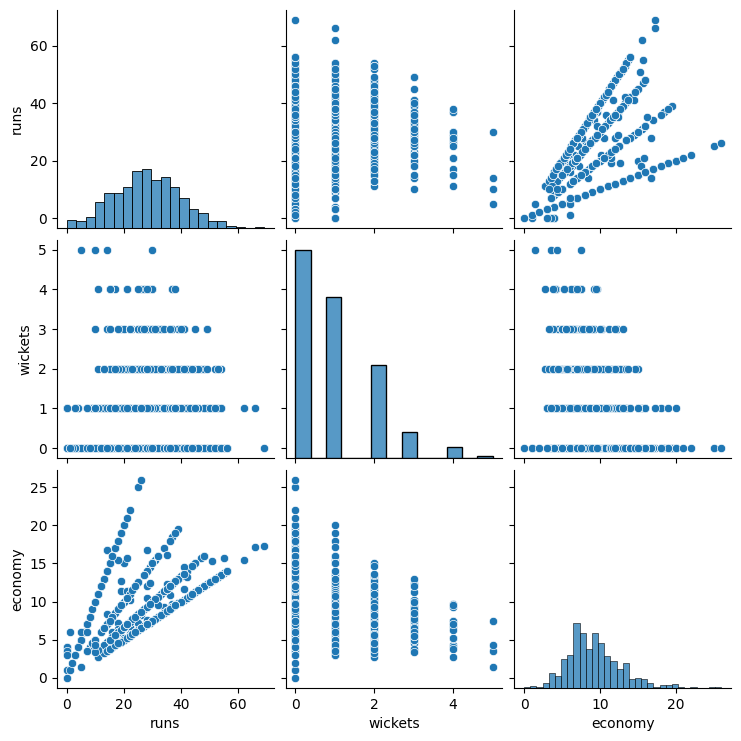

In [8]:
# Visualize distributions of important features
#pairplot
sns.pairplot(df[['runs', 'wickets', 'economy']])
plt.show()

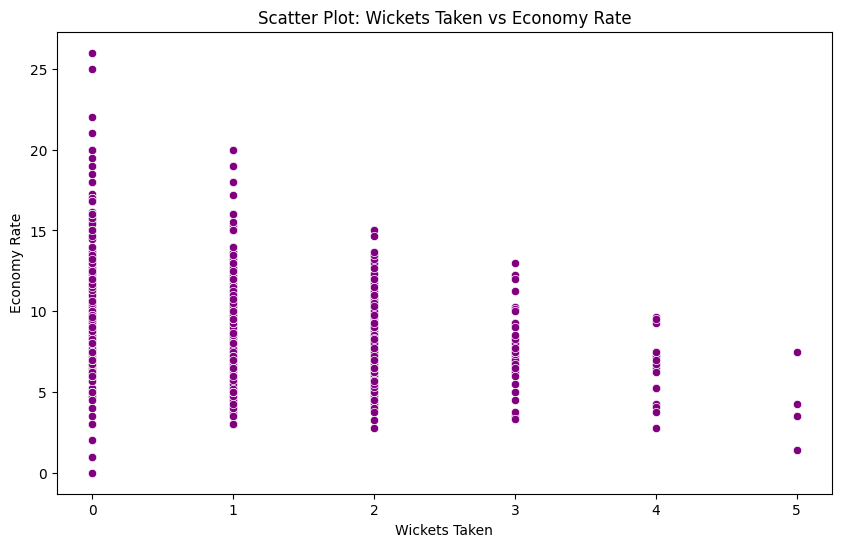

In [9]:
# Scatter plot to explore relationship between Wickets_Taken and Economy_Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wickets', y='economy', data=df, color='purple')
plt.title('Scatter Plot: Wickets Taken vs Economy Rate')
plt.xlabel('Wickets Taken')
plt.ylabel('Economy Rate')
plt.show()

<ipython-input-10-2e8b38f47b94>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_economy_by_team.index, y=avg_economy_by_team.values, palette='viridis')


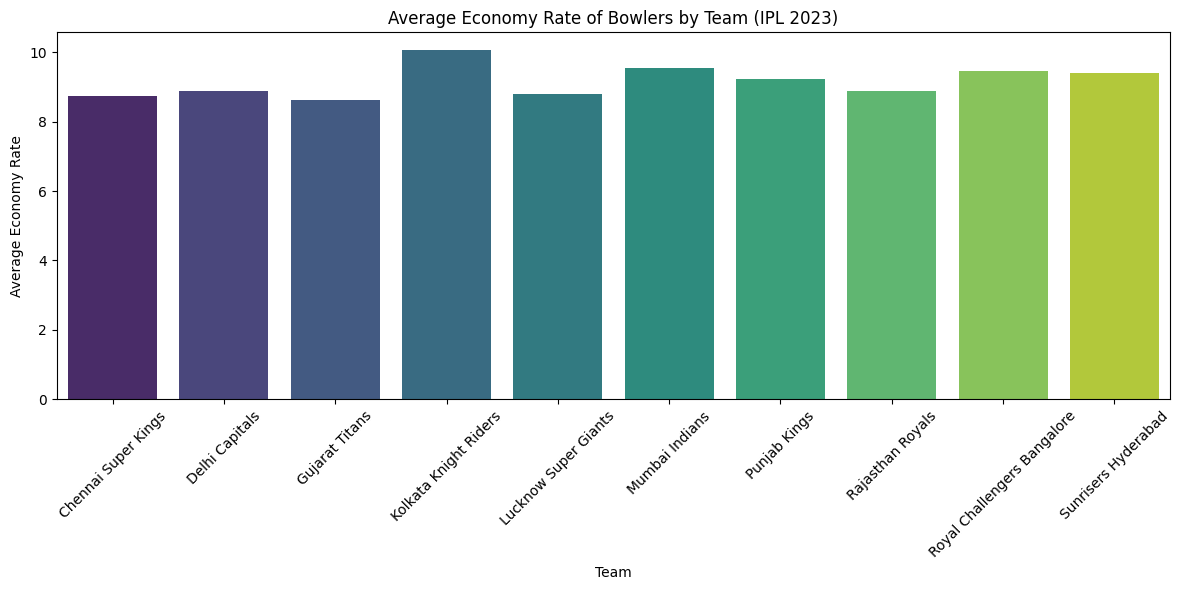

In [10]:
#barplot
avg_economy_by_team = df.groupby('bowlingTeam')['economy'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_economy_by_team.index, y=avg_economy_by_team.values, palette='viridis')
plt.title('Average Economy Rate of Bowlers by Team (IPL 2023)')
plt.xlabel('Team')
plt.ylabel('Average Economy Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-14-2427e712dde1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['runs'], bins=30, kde=False, rug=True)  # Adjust bins as needed


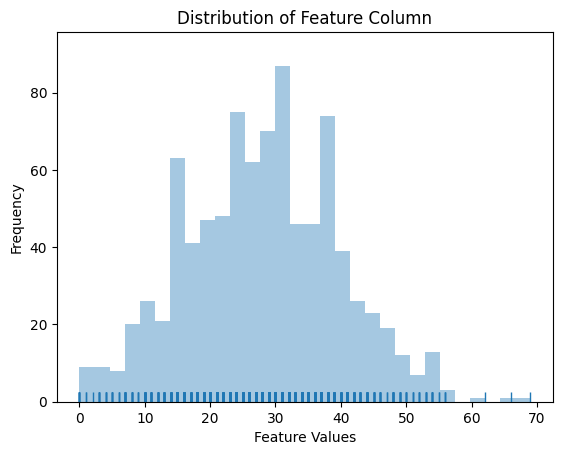

In [14]:
#distplot
sns.distplot(df['runs'], bins=30, kde=False, rug=True)  # Adjust bins as needed
plt.title('Distribution of Feature Column')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.show()

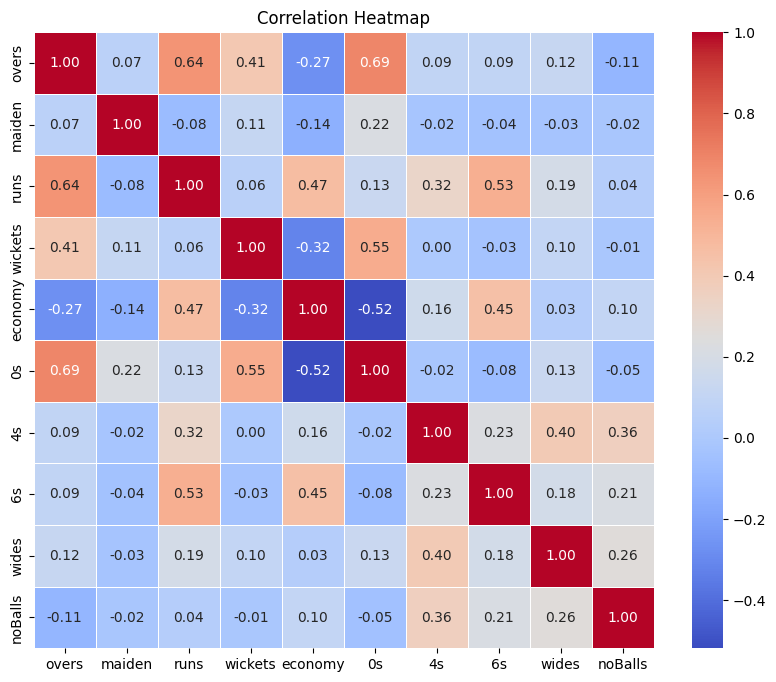

In [15]:
#Heatmap
# Drop non-numeric columns before calculating correlations
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Step 5: Feature Selection and Engineering**

In [16]:
#FEATURE SELECTION
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame
# Drop non-numeric columns or process them accordingly
df_numeric = df.drop(['match', 'bowlingTeam','bowlerName'], axis=1)

# Encode categorical variables if any
label_encoders = {}
for column in df_numeric.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_numeric[column] = label_encoders[column].fit_transform(df_numeric[column])

# Split data into features and target
X = df_numeric.drop('wickets', axis=1)
y = df_numeric['wickets']

model=RandomForestRegressor()
model.fit(X,y)

# Getting feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

          importance
0s          0.339780
match_id    0.203050
economy     0.124300
runs        0.099091
4s          0.073724
wides       0.054303
6s          0.045071
overs       0.041110
noBalls     0.015566
maiden      0.004005


**Step 6: Build and Evaluate Machine Learning Models**

In [21]:
# Initialize models
from sklearn.svm import SVR # Import the SVR class
from sklearn.ensemble import GradientBoostingRegressor # Import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler for scaling

models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'MLP Regressor': MLPRegressor()
}

# Assuming X and y are already defined from your feature selection step

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluation metrics
    print(f"Model: {name}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
    print("-------------------------")

Model: Random Forest
MAE: 0.6898888888888889
MSE: 0.81144
RMSE: 0.9007996447601431
R2 Score: 0.19003493638128088
-------------------------
Model: SVR
MAE: 0.6067502362377928
MSE: 0.7010382616681051
RMSE: 0.8372802766505999
R2 Score: 0.30023599993694783
-------------------------
Model: Linear Regression
MAE: 0.6177049370981739
MSE: 0.672453640366509
RMSE: 0.8200327068882735
R2 Score: 0.32876866361025003
-------------------------
Model: Gradient Boosting
MAE: 0.6707964391525256
MSE: 0.7531688151200204
RMSE: 0.8678529916523998
R2 Score: 0.2482002030287851
-------------------------
Model: AdaBoost
MAE: 0.760336817039295
MSE: 0.8474370354523574
RMSE: 0.920563433692843
R2 Score: 0.15410333193701653
-------------------------
Model: MLP Regressor
MAE: 0.6316872952501204
MSE: 0.6900364326616485
RMSE: 0.8306843158875991
R2 Score: 0.31121783116431756
-------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Step7:HyperparameterTuning**

1.RANDOMFORESTREGRESSION

In [24]:
 # Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [46]:
# Evaluate the model on the test set
y_pred = best_model.predict(X_test_scaled) # Use 'best_model' and scaled test data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 0.73
Root Mean Squared Error (RMSE): 0.85
R-squared (R2): 0.27


In [48]:
# Save the trained model to a file
from joblib import dump
dump(best_model, 'rf_best_model.joblib')

['rf_best_model.joblib']

In [57]:
#Test with Unseen Data:
# Assess the model's performance on unseen data
# Load the saved model and test with new data
loaded_model = joblib.load('rf_best_model.joblib')

# Assuming X_test_scaled is the numerically encoded version of X_test
y_pred_unseen = loaded_model.predict(X_test_scaled)  # Use the scaled test data

unseen_results = {'MAE': mean_absolute_error(y_test, y_pred_unseen),
                  'MSE': mean_squared_error(y_test, y_pred_unseen),
                  'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_unseen)),
                  'R2': r2_score(y_test, y_pred_unseen)}

unseen_results

{'MAE': 0.6600630055410446,
 'MSE': 0.7304172628060831,
 'RMSE': 0.85464452423571,
 'R2': 0.27091040035376646}

**INTERPRETATION OF RESULTS (CONCLUSION):**

In addition to analyzing model performance, consider interpreting feature importances from algorithms like Random Forest, which can provide insights into which features are driving predictions

**FUTURE WORK:**
 The suggestions for future work are insightful, particularly incorporating player injury data. This could be crucial in predicting performance, as player fitness often impacts their gameplay. By following these suggestions and executing the outlined plan meticulously, you should be well-equipped to develop a robust model for predicting IPL 2023 player performance.